# Preparación e importación de Datos

Importación de librerias

In [48]:
# Importe el conjunto de datos de diabetes y divídalo en entrenamiento y prueba usando scikit-learn
from sklearn.model_selection import train_test_split

import mlflow 
import mlflow.keras
import mlflow.sklearn
from sklearn.metrics import mean_squared_error
import keras
import tensorflow as tf
import tensorflow.keras as tk
from keras import models
from keras import layers

import pandas as pd
import numpy as np



Lectura De datos

In [49]:
df = pd.read_csv('DataArbnbBarcelonaLimpio.csv')
df.head()


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,...,availability_365,number_of_reviews,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,instant_bookable,calculated_host_listings_count,reviews_per_month
0,0.96,0.91,f,41,46,t,la Sagrada FamÃ­lia,41.405560,2.17262,Entire rental unit,...,80,51,74,42,8820,4.34,4.40,t,26,0.34
1,1.00,0.96,t,6,9,t,el BesÃ²s i el Maresme,41.412432,2.21975,Entire rental unit,...,289,91,82,72,20520,4.82,4.94,f,1,0.52
2,1.00,1.00,f,3,15,t,el Camp d'en Grassot i GrÃ cia Nova,41.405660,2.17015,Entire rental unit,...,64,152,64,138,23460,4.46,4.43,f,2,0.88
3,1.00,0.92,f,5,5,t,el Barri GÃ²tic,41.380620,2.17517,Entire condo,...,333,25,108,255,28050,4.36,4.45,f,3,0.14
4,1.00,0.92,f,5,5,t,el Barri GÃ²tic,41.379780,2.17623,Entire rental unit,...,335,271,78,230,76590,4.57,4.61,f,3,1.49


Se pasan los datos true false a ceros y unos

In [50]:
df.replace({"t": 1 ,"f":0},inplace=True)

df.head()

C:\Users\marti\AppData\Local\Temp\ipykernel_6848\3387360302.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"t": 1 ,"f":0},inplace=True)


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,...,availability_365,number_of_reviews,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,instant_bookable,calculated_host_listings_count,reviews_per_month
0,0.96,0.91,0,41,46,1,la Sagrada FamÃ­lia,41.405560,2.17262,Entire rental unit,...,80,51,74,42,8820,4.34,4.40,1,26,0.34
1,1.00,0.96,1,6,9,1,el BesÃ²s i el Maresme,41.412432,2.21975,Entire rental unit,...,289,91,82,72,20520,4.82,4.94,0,1,0.52
2,1.00,1.00,0,3,15,1,el Camp d'en Grassot i GrÃ cia Nova,41.405660,2.17015,Entire rental unit,...,64,152,64,138,23460,4.46,4.43,0,2,0.88
3,1.00,0.92,0,5,5,1,el Barri GÃ²tic,41.380620,2.17517,Entire condo,...,333,25,108,255,28050,4.36,4.45,0,3,0.14
4,1.00,0.92,0,5,5,1,el Barri GÃ²tic,41.379780,2.17623,Entire rental unit,...,335,271,78,230,76590,4.57,4.61,0,3,1.49


In [51]:
df['price'] = pd.to_numeric(df['price'].str.replace(r'[\$,]', '', regex=True))
df['price'].head()

0    210.0
1    285.0
2    170.0
3    110.0
4    333.0
Name: price, dtype: float64

In [52]:
# Calcular la media de la columna price
media_price = df['price'].mean()

# Crear la nueva columna binaria
df['price'] = (df['price'] < media_price).astype(int)
df['price'].head()

0    0
1    0
2    1
3    1
4    0
Name: price, dtype: int64

In [53]:
print(df["neighbourhood_cleansed"].unique())

['la Sagrada FamÃ\xadlia' 'el BesÃ²s i el Maresme'
 "el Camp d'en Grassot i GrÃ\xa0cia Nova" 'el Barri GÃ²tic'
 "la Dreta de l'Eixample" 'Vallcarca i els Penitents' 'el Raval'
 'el Poblenou' 'el Clot' 'el Poble Sec' 'Sant Antoni' 'Sants' 'Pedralbes'
 'el GuinardÃ³' "l'Antiga Esquerra de l'Eixample" 'la Vila de GrÃ\xa0cia'
 'Diagonal Mar i el Front MarÃ\xadtim del Poblenou' 'el Fort Pienc'
 'la Barceloneta' 'Sant MartÃ\xad de ProvenÃ§als'
 "la Nova Esquerra de l'Eixample" 'SarriÃ\xa0'
 'el Parc i la Llacuna del Poblenou'
 'Sant Pere, Santa Caterina i la Ribera'
 'la Vila OlÃ\xadmpica del Poblenou' 'les Corts' 'el Putxet i el FarrÃ³'
 'Sant Gervasi - Galvany' 'el CongrÃ©s i els Indians' 'la Bordeta'
 'la Maternitat i Sant Ramon' 'ProvenÃ§als del Poblenou' 'Sants - Badal'
 'Navas' 'el Carmel' 'la Salut' 'Hostafrancs' 'la Font de la Guatlla'
 'Sant Gervasi - la Bonanova' 'les Tres Torres'
 'Vallvidrera, el Tibidabo i les Planes' 'la Teixonera' 'Can BarÃ³'
 "el Camp de l'Arpa del Clot" 'la 

Se traducen los textos de los barrios aun lenguaje legible

In [54]:
barrios_corregidos = {
    'la Sagrada FamÃ\xadlia': 'La Sagrada Família',
    'el BesÃ²s i el Maresme': 'El Besòs i el Maresme',
    "el Camp d'en Grassot i GrÃ\xa0cia Nova": "El Camp d'en Grassot i Gràcia Nova",
    'el Barri GÃ²tic': 'El Barri Gòtic',
    "la Dreta de l'Eixample": "La Dreta de l'Eixample",
    'Vallcarca i els Penitents': 'Vallcarca i els Penitents',
    'el Raval': 'El Raval',
    'el Poblenou': 'El Poblenou',
    'el Clot': 'El Clot',
    'el Poble Sec': 'El Poble-sec',
    'Sant Antoni': 'Sant Antoni',
    'Sants': 'Sants',
    'Pedralbes': 'Pedralbes',
    'el GuinardÃ³': 'El Guinardó',
    "l'Antiga Esquerra de l'Eixample": "L'Antiga Esquerra de l'Eixample",
    'la Vila de GrÃ\xa0cia': 'La Vila de Gràcia',
    'Diagonal Mar i el Front MarÃ\xadtim del Poblenou': 'Diagonal Mar i el Front Marítim del Poblenou',
    'el Fort Pienc': 'El Fort Pienc',
    'la Barceloneta': 'La Barceloneta',
    'Sant MartÃ\xad de ProvenÃ§als': 'Sant Martí de Provençals',
    "la Nova Esquerra de l'Eixample": "La Nova Esquerra de l'Eixample",
    'SarriÃ\xa0': 'Sarrià',
    'el Parc i la Llacuna del Poblenou': 'El Parc i la Llacuna del Poblenou',
    'Sant Pere, Santa Caterina i la Ribera': 'Sant Pere, Santa Caterina i la Ribera',
    'la Vila OlÃ\xadmpica del Poblenou': 'La Vila Olímpica del Poblenou',
    'les Corts': 'Les Corts',
    'el Putxet i el FarrÃ³': 'El Putxet i el Farró',
    'Sant Gervasi - Galvany': 'Sant Gervasi - Galvany',
    'el CongrÃ©s i els Indians': 'El Congrés i els Indians',
    'la Bordeta': 'La Bordeta',
    'la Maternitat i Sant Ramon': 'La Maternitat i Sant Ramon',
    'ProvenÃ§als del Poblenou': 'Provençals del Poblenou',
    'Sants - Badal': 'Sants - Badal',
    'Navas': 'Navas',
    'el Carmel': 'El Carmel',
    'la Salut': 'La Salut',
    'Hostafrancs': 'Hostafrancs',
    'la Font de la Guatlla': 'La Font de la Guatlla',
    'Sant Gervasi - la Bonanova': 'Sant Gervasi - la Bonanova',
    'les Tres Torres': 'Les Tres Torres',
    'Vallvidrera, el Tibidabo i les Planes': 'Vallvidrera, el Tibidabo i les Planes',
    'la Teixonera': 'La Teixonera',
    'Can BarÃ³': 'Can Baró',
    "el Camp de l'Arpa del Clot": "El Camp de l'Arpa del Clot",
    'la Marina del Prat Vermell': 'La Marina del Prat Vermell',
    'el Baix GuinardÃ³': 'El Baix Guinardó',
    'la Verneda i la Pau': 'La Verneda i la Pau',
    'Porta': 'Porta',
    'Vilapicina i la Torre Llobeta': 'Vilapicina i la Torre Llobeta',
    'el Coll': 'El Coll',
    'la Sagrera': 'La Sagrera',
    'Sant Andreu': 'Sant Andreu',
    "la Font d'en Fargues": "La Font d'en Fargues",
    'la Guineueta': 'La Guineueta',
    'Horta': 'Horta',
    "la Vall d'Hebron": "La Vall d'Hebron",
    'la Prosperitat': 'La Prosperitat',
    'les Roquetes': 'Les Roquetes',
    'la Marina de Port': 'La Marina de Port',
    'el TurÃ³ de la Peira': 'El Turó de la Peira',
    'Can Peguera': 'Can Peguera',
    'Verdun': 'Verdun',
    'la Trinitat Vella': 'La Trinitat Vella',
    'la Clota': 'La Clota',
    'Sant GenÃ\xads dels Agudells': 'Sant Genís dels Agudells',
    'Montbau': 'Montbau',
    'la Trinitat Nova': 'La Trinitat Nova',
    'el Bon Pastor': 'El Bon Pastor',
    'Canyelles': 'Canyelles',
    'Ciutat Meridiana': 'Ciutat Meridiana'
}

df["neighbourhood_cleansed"].replace( barrios_corregidos, inplace=True)

C:\Users\marti\AppData\Local\Temp\ipykernel_6848\2630809960.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["neighbourhood_cleansed"].replace( barrios_corregidos, inplace=True)


# Modelo de Predicción del Precio


In [55]:

#booleanas y enteros
cat_int_feats = ['host_is_superhost','host_listings_count','host_total_listings_count','host_has_profile_pic','accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'availability_eoy', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'instant_bookable', 'calculated_host_listings_count']
#
cat_str_feats = ['neighbourhood_cleansed', 'property_type', 'room_type']

#variables numericas
num_feats = ['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'review_scores_rating', 'review_scores_accuracy', 'reviews_per_month']

#se quiere estimar el precio


In [56]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats
df = df[feats_ordered+['price']]
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,...,property_type,room_type,host_response_rate,host_acceptance_rate,latitude,longitude,review_scores_rating,review_scores_accuracy,reviews_per_month,price
0,0,41,46,1,8,3.0,6.0,1,1125,80,...,Entire rental unit,Entire home/apt,0.96,0.91,41.405560,2.17262,4.34,4.40,0.34,0
1,1,6,9,1,5,3.0,4.0,3,32,289,...,Entire rental unit,Entire home/apt,1.00,0.96,41.412432,2.21975,4.82,4.94,0.52,0
2,0,3,15,1,6,2.0,3.0,1,31,64,...,Entire rental unit,Entire home/apt,1.00,1.00,41.405660,2.17015,4.46,4.43,0.88,1
3,0,5,5,1,2,1.0,1.0,31,180,333,...,Entire condo,Entire home/apt,1.00,0.92,41.380620,2.17517,4.36,4.45,0.14,1
4,0,5,5,1,9,4.0,6.0,5,365,335,...,Entire rental unit,Entire home/apt,1.00,0.92,41.379780,2.17623,4.57,4.61,1.49,0


Separación De datos de entrenamiento y validación

In [57]:
train = df.sample(frac=0.8, random_state=100)
print(train.shape)

(11166, 27)


In [58]:
test = df.drop(train.index)
test.shape

(2791, 27)

In [59]:
val = train.sample(frac=0.2, random_state=100)
val.shape

(2233, 27)

In [60]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("price")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [61]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

## Parámetros Red Neuronal

In [62]:
#mlflow.set_tracking_uri('http://localhost:5000')
# registre el experimento
#experiment = mlflow.set_experiment("/proyecto2_clas_Airbnb")

In [63]:
inputs = []
for i in cat_int_feats:
    inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))
for i in cat_str_feats:
    inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))
for i in num_feats:
    inputs.append(keras.Input(shape=(1,), name=i))

# Codificación/normalización de features (usa las funciones definidas en el notebook)
feats_encoded = []
for i, feat in enumerate(cat_int_feats):
    feats_encoded.append(encode_categorical_feature(inputs[i], feat, train_ds, False))

len_feats = len(feats_encoded)
for i, feat in enumerate(cat_str_feats):
    feats_encoded.append(encode_categorical_feature(inputs[len_feats + i], feat, train_ds, True))

len_feats = len(feats_encoded)
for i, feat in enumerate(num_feats):
    feats_encoded.append(encode_numerical_feature(inputs[len_feats + i], feat, train_ds))

# Concatenar todas las features codificadas
all_feats = keras.layers.concatenate(feats_encoded)

In [64]:
#mlflow.end_run()
n_epochs = 10
learning_rate = 0.05
num_hidden_units = 64
num_hidden_layers = 5
batch_size = 32

def run_model(
    n_epochs=n_epochs,
    learning_rate=learning_rate,
    num_hidden_units=num_hidden_units,
    num_hidden_layers=num_hidden_layers,
    batch_size=batch_size,
):
    """
    Construye y entrena el modelo de clasificación usando los
    tf.data train_ds y val_ds ya definidos.
    """
    # ← aquí usas el mismo `all_feats` y `inputs` que ya definiste
    x = all_feats
    for _ in range(int(num_hidden_layers)):
        x = keras.layers.Dense(int(num_hidden_units), activation="relu")(x)

    # salida de clasificación binaria
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy", keras.metrics.Precision(), keras.metrics.Recall()],
    )

    train_ds_batched = train_ds.batch(batch_size)
    val_ds_batched = val_ds.batch(batch_size)

    history = model.fit(
        train_ds_batched,
        validation_data=val_ds_batched,
        epochs=int(n_epochs),
    )

    return model, history


In [65]:

#MEJOR 

"""
n_epochs = 30
learning_rate = 0.001
num_hidden_units = 64
num_hidden_layers = 5
batch_size = 32

"""
'''
Default
n_epochs = 10
learning_rate = 0.05
num_hidden_units = 64
num_hidden_layers = 5
batch_size = 32
'''

n_epochs = 50
learning_rate = 0.001
num_hidden_units = 64
num_hidden_layers = 5
batch_size = 32

In [66]:
#mlflow.end_run()

In [70]:
model_clf, history_clf = run_model(
    n_epochs=n_epochs,
    learning_rate=learning_rate,
    num_hidden_units=num_hidden_units,
    num_hidden_layers=num_hidden_layers,
    batch_size=batch_size,
)#print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8384 - loss: 0.3451 - precision_1: 0.8600 - recall_1: 0.9109 - val_accuracy: 0.9315 - val_loss: 0.1863 - val_precision_1: 0.9560 - val_recall_1: 0.9442
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9285 - loss: 0.1844 - precision_1: 0.9424 - recall_1: 0.9533 - val_accuracy: 0.9745 - val_loss: 0.0940 - val_precision_1: 0.9812 - val_recall_1: 0.9818
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9685 - loss: 0.0892 - precision_1: 0.9716 - recall_1: 0.9824 - val_accuracy: 0.9848 - val_loss: 0.0493 - val_precision_1: 0.9883 - val_recall_1: 0.9896
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0493 - precision_1: 0.9848 - recall_1: 0.9903 - val_accuracy: 0.9937 - val_loss: 0.0261 - val_precision_1: 0.9929 - val_recall_1: 0.9981
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9897 - loss: 0.0280 - precision_1: 0.9911 - recall_1: 0.9938 -

In [71]:
type(test_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

batch_size = 32

# usar directamente el modelo que entrenaste
model = model_clf   # <<--- ESTA ES LA CLAVE

# dataset solo con features (como se hizo para el entrenamiento)
test_features_ds = test_ds.map(lambda x, y: x).batch(batch_size)

# predicciones de probabilidad
probs = model.predict(test_features_ds).flatten()
y_pred = (probs >= 0.5).astype(int)

# extraer labels reales desde test_ds (sin batch)
y_true = np.array([y.numpy() for x, y in test_ds])

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Matriz de confusión:\n", cm)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.5775707631673236
              precision    recall  f1-score   support

           0       0.34      0.32      0.33       897
           1       0.68      0.70      0.69      1894

    accuracy                           0.58      2791
   macro avg       0.51      0.51      0.51      2791
weighted avg       0.57      0.58      0.57      2791

Matriz de confusión:
 [[ 287  610]
 [ 569 1325]]


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


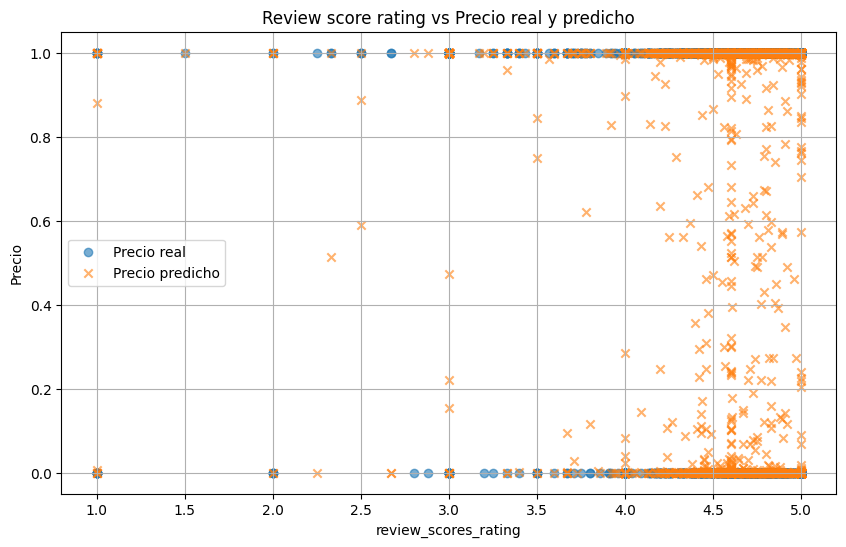

MSE: 0.4111664891242981
MAE: 0.42261892557144165


In [74]:
# ...existing code...
# Celda nueva: obtener predicciones y graficar review_scores_rating vs precio real y predicho

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

batch_size = 32

#model = experimentID
# Dataset solo con features (en el mismo orden esperado por el modelo) y en batches para predecir
test_features_ds = test_ds.map(lambda x, y: x).batch(batch_size)

# Predicciones (aplana salida)
preds = model.predict(test_features_ds).flatten()

# Extraer precios reales y review_scores_rating desde el test_ds (sin batch)
test_y = np.array([y.numpy() for x, y in test_ds])
test_review = np.array([x['review_scores_rating'].numpy() for x, y in test_ds])

# Si hay NaNs en review_scores_rating, filtrarlos para la gráfica
mask = ~np.isnan(test_review)
test_review = test_review[mask]
test_y = test_y[mask]
preds = preds[mask]

# Gráfica comparativa
plt.figure(figsize=(10,6))
plt.scatter(test_review, test_y, alpha=0.6, label='Precio real')
plt.scatter(test_review, preds, alpha=0.6, label='Precio predicho', marker='x')
plt.xlabel('review_scores_rating')
plt.ylabel('Precio')
plt.title('Review score rating vs Precio real y predicho')
plt.legend()
plt.grid(True)
plt.show()

# Métricas de desempeño
print('MSE:', mean_squared_error(test_y, preds))
print('MAE:', mean_absolute_error(test_y, preds))
# ...existing code...

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(0, 0.5, 'Precio')

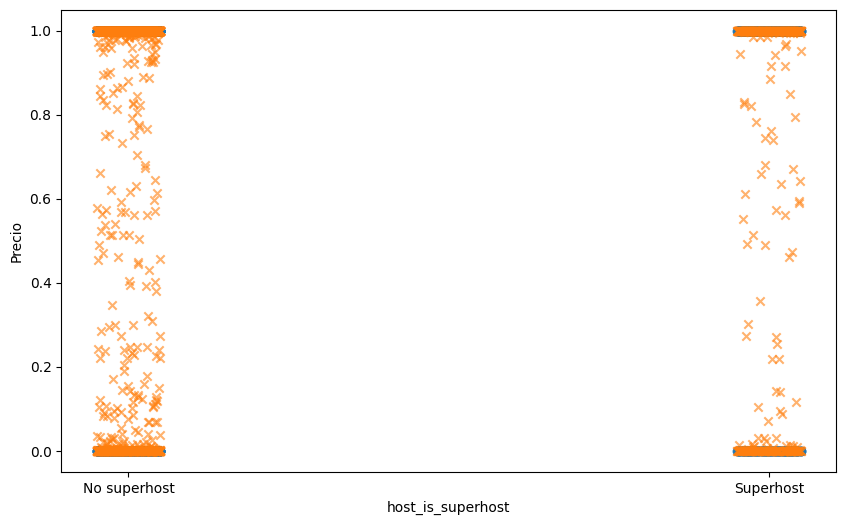

In [75]:
batch_size = 32
#model = experimentID
# Dataset solo con features para predecir
test_features_ds = test_ds.map(lambda x, y: x).batch(batch_size)

# Predicciones (aplana salida)
preds = model.predict(test_features_ds).flatten()

# Extraer precios reales y flag host_is_superhost desde test_ds (sin batch)
test_y = np.array([y.numpy() for x, y in test_ds])
host_flag = np.array([x['host_is_superhost'].numpy() for x, y in test_ds])

# Alinear longitudes por si hubo diferencias (usa la longitud mínima)
n = min(len(preds), len(test_y), len(host_flag))
preds = preds[:n]
test_y = test_y[:n]
host_flag = host_flag[:n]

# Scatter con jitter para visualizar ambos grupos 0/1
rng = np.random.default_rng(42)
jitter = (rng.random(n) - 0.5) * 0.1

plt.figure(figsize=(10,6))
plt.scatter(host_flag + jitter, test_y, alpha=0.6, label='Precio real')
plt.scatter(host_flag + jitter, preds, alpha=0.6, label='Precio predicho', marker='x')
plt.xticks([0,1], ['No superhost', 'Superhost'])
plt.xlabel('host_is_superhost')
plt.ylabel('Precio')


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


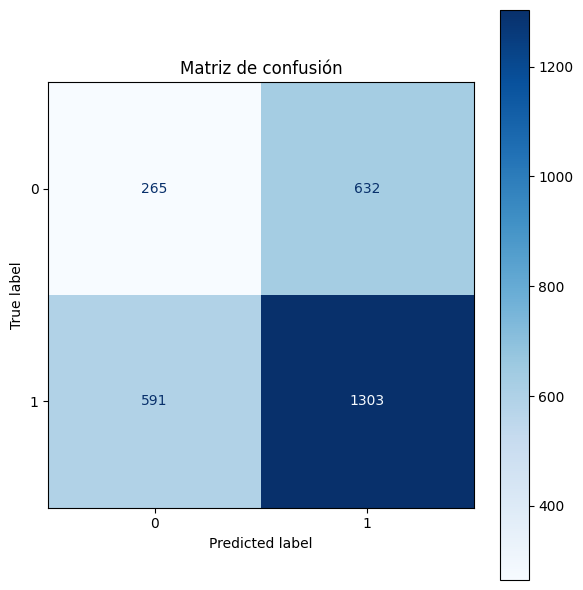

In [76]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# seleccionar modelo disponible
model = globals().get("model", globals().get("first_model", globals().get("experimentID", None)))
if model is None:
    raise RuntimeError("No se encontró un modelo en 'model', 'first_model' ni 'experimentID'.")

# predecir en batches y obtener etiquetas verdaderas
batch_size = 32
test_features_ds = test_ds.map(lambda x, y: x).batch(batch_size)
preds_prob = model.predict(test_features_ds).flatten()
y_true = np.array([y.numpy() for x, y in test_ds]).reshape(-1)

# alinear y binarizar
n = min(len(preds_prob), len(y_true))
preds_prob = preds_prob[:n]
y_true = y_true[:n]
y_pred = (preds_prob >= 0.5).astype(int)

# matriz de confusión y plot
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
ax.set_title("Matriz de confusión")
plt.tight_layout()
plt.show()
# ...existing code...

In [ ]:
from pathlib import Path

MODEL_CLF_PATH = Path("dashboard_airbnb/data/recommend_model.keras")

MODEL_CLF_PATH.parent.mkdir(parents=True, exist_ok=True)
model_clf.save(MODEL_CLF_PATH)
print("Modelo de clasificación guardado en:", MODEL_CLF_PATH)

Modelo de clasificación guardado en: dashboard_airbnb\data\recommend_model.keras
